In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Y69K4HR1sTWT9GUq1Dk1")
project = rf.workspace("fyp-terry-lee").project("exam-monitoring-system-v2")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 3.2 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12.1
  Attempting uninstall: certifi
    Found existing installa


Extracting Dataset Version Zip to Exam-Monitoring-System-v2-2 in yolov8:: 100%|██████████| 4396/4396 [00:00<00:00, 9100.08it/s]


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.7 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.7/8062.4 GB disk)


In [3]:
# Define a function to write text to a file
def write_text_to_file(text, file_path):
    with open(file_path, 'w') as file:
        file.write(text)


text="""
names:
- cheating
- good
nc: 2
roboflow:
  license: CC BY 4.0
  project: exam-monitoring-system-v2
  url: https://universe.roboflow.com/fyp-terry-lee/exam-monitoring-system-v2/dataset/2
  version: 2
  workspace: fyp-terry-lee
test: /kaggle/working/Exam-Monitoring-System-v2-2/test/images
train: /kaggle/working/Exam-Monitoring-System-v2-2/train/images
val: /kaggle/working/Exam-Monitoring-System-v2-2/valid/images


"""

write_text_to_file(text, "/kaggle/working/Exam-Monitoring-System-v2-2/data.yaml")

In [4]:
# Train YOLOv8n on COCO8 for 10 epochs
!yolo task= detect mode= train data=/kaggle/working/Exam-Monitoring-System-v2-2/data.yaml model=yolov8n.pt epochs=15 imgsz=640 batch=16

100%|██████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 72.8MB/s]
Ultralytics YOLOv8.2.7 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Exam-Monitoring-System-v2-2/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

In [5]:
from IPython.display import Image, display

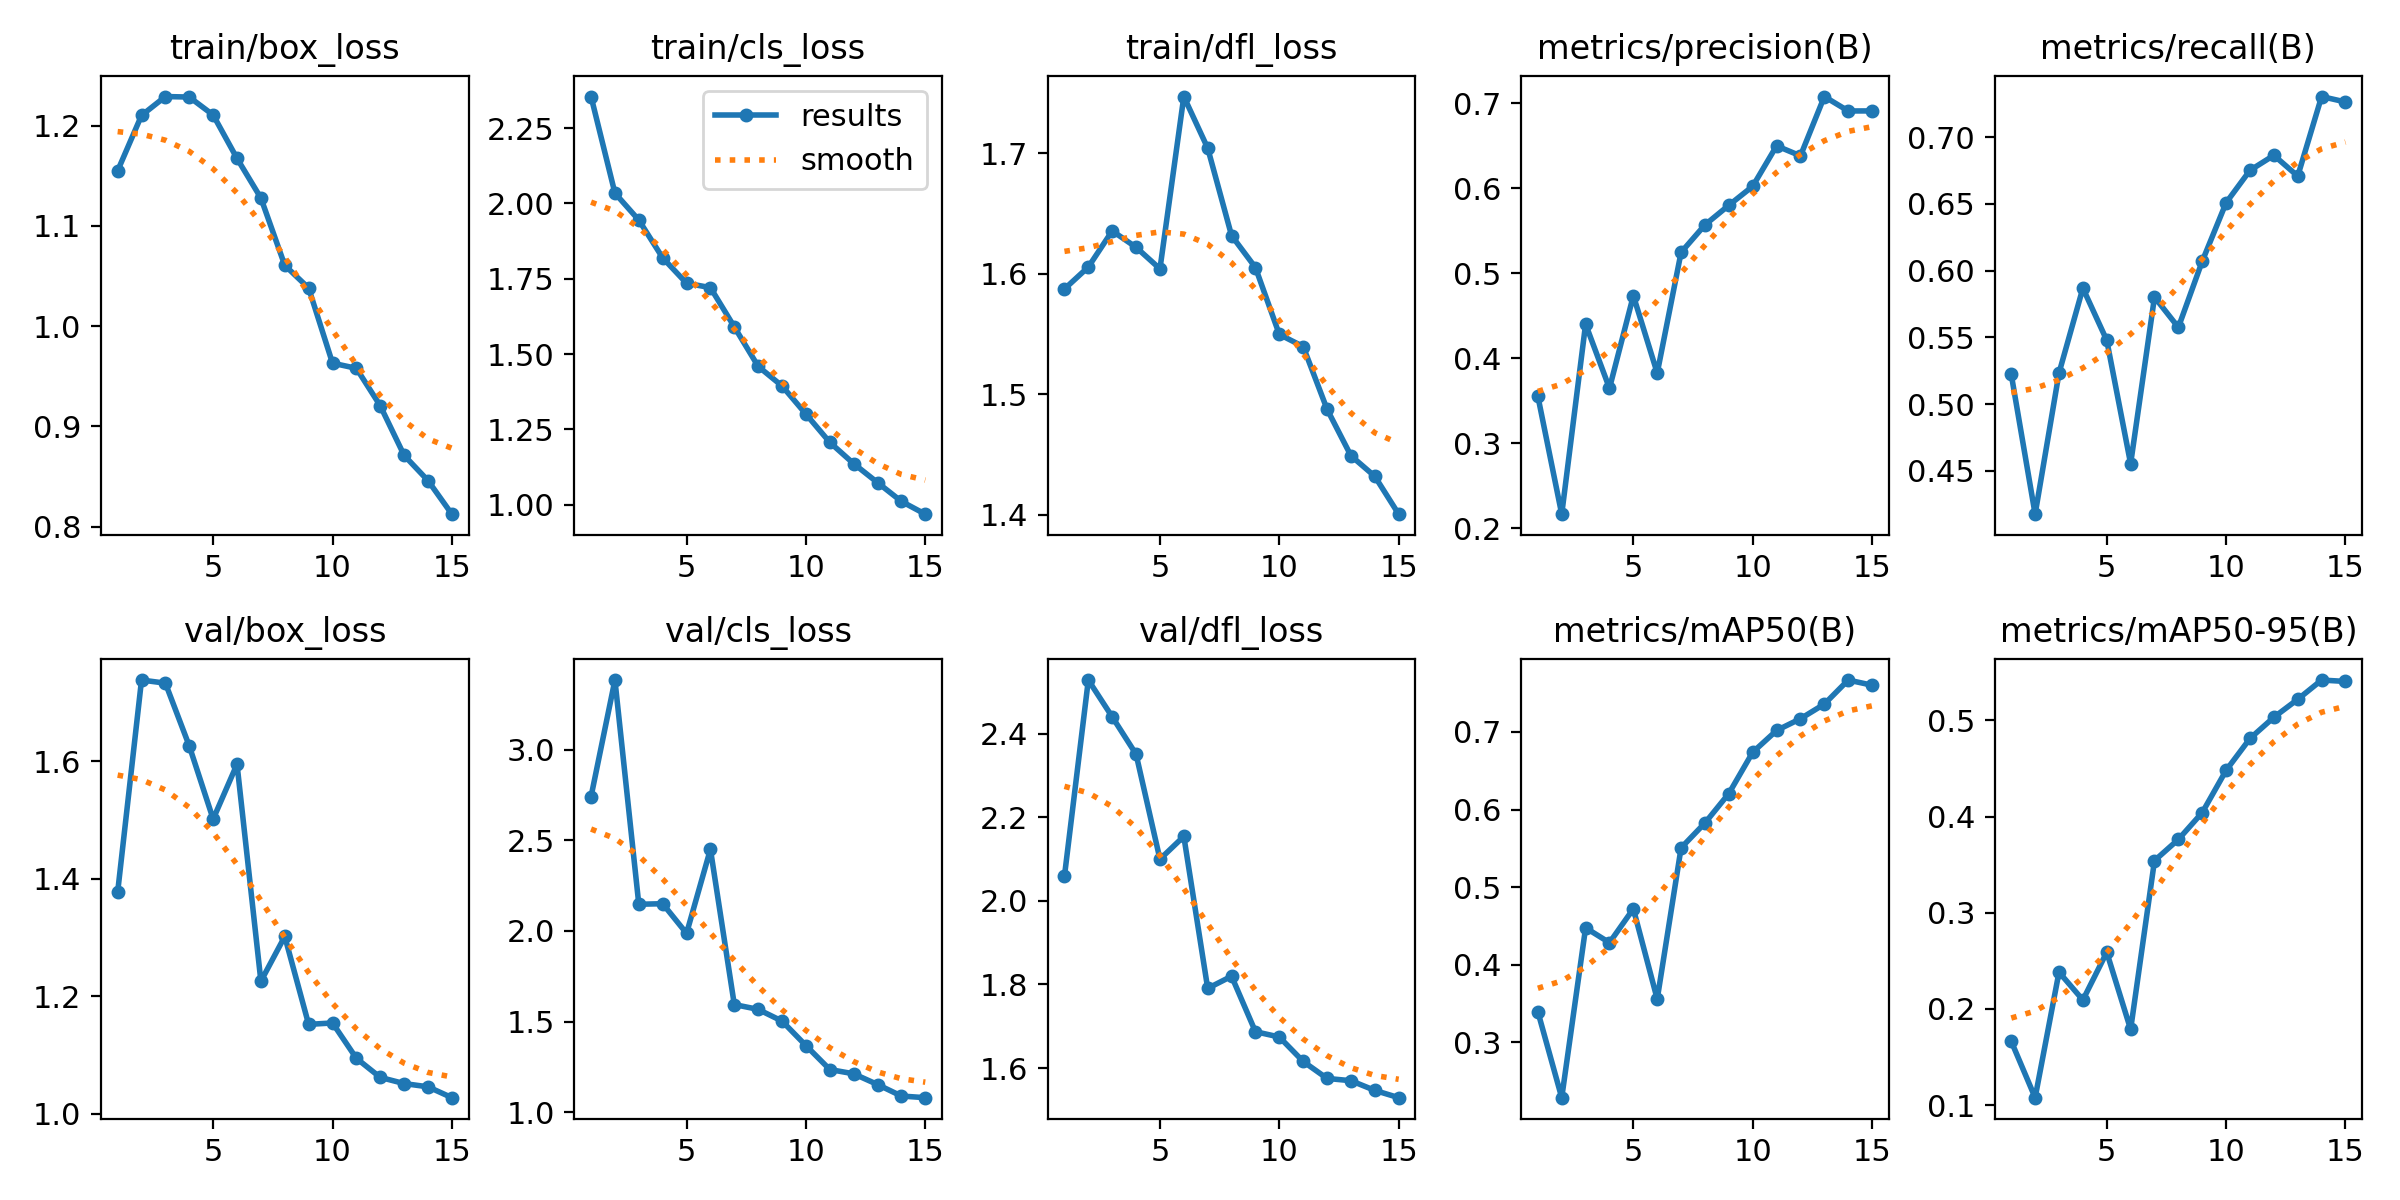

In [6]:
display(Image(filename=f"/kaggle/working/runs/detect/train/results.png", width=1000))

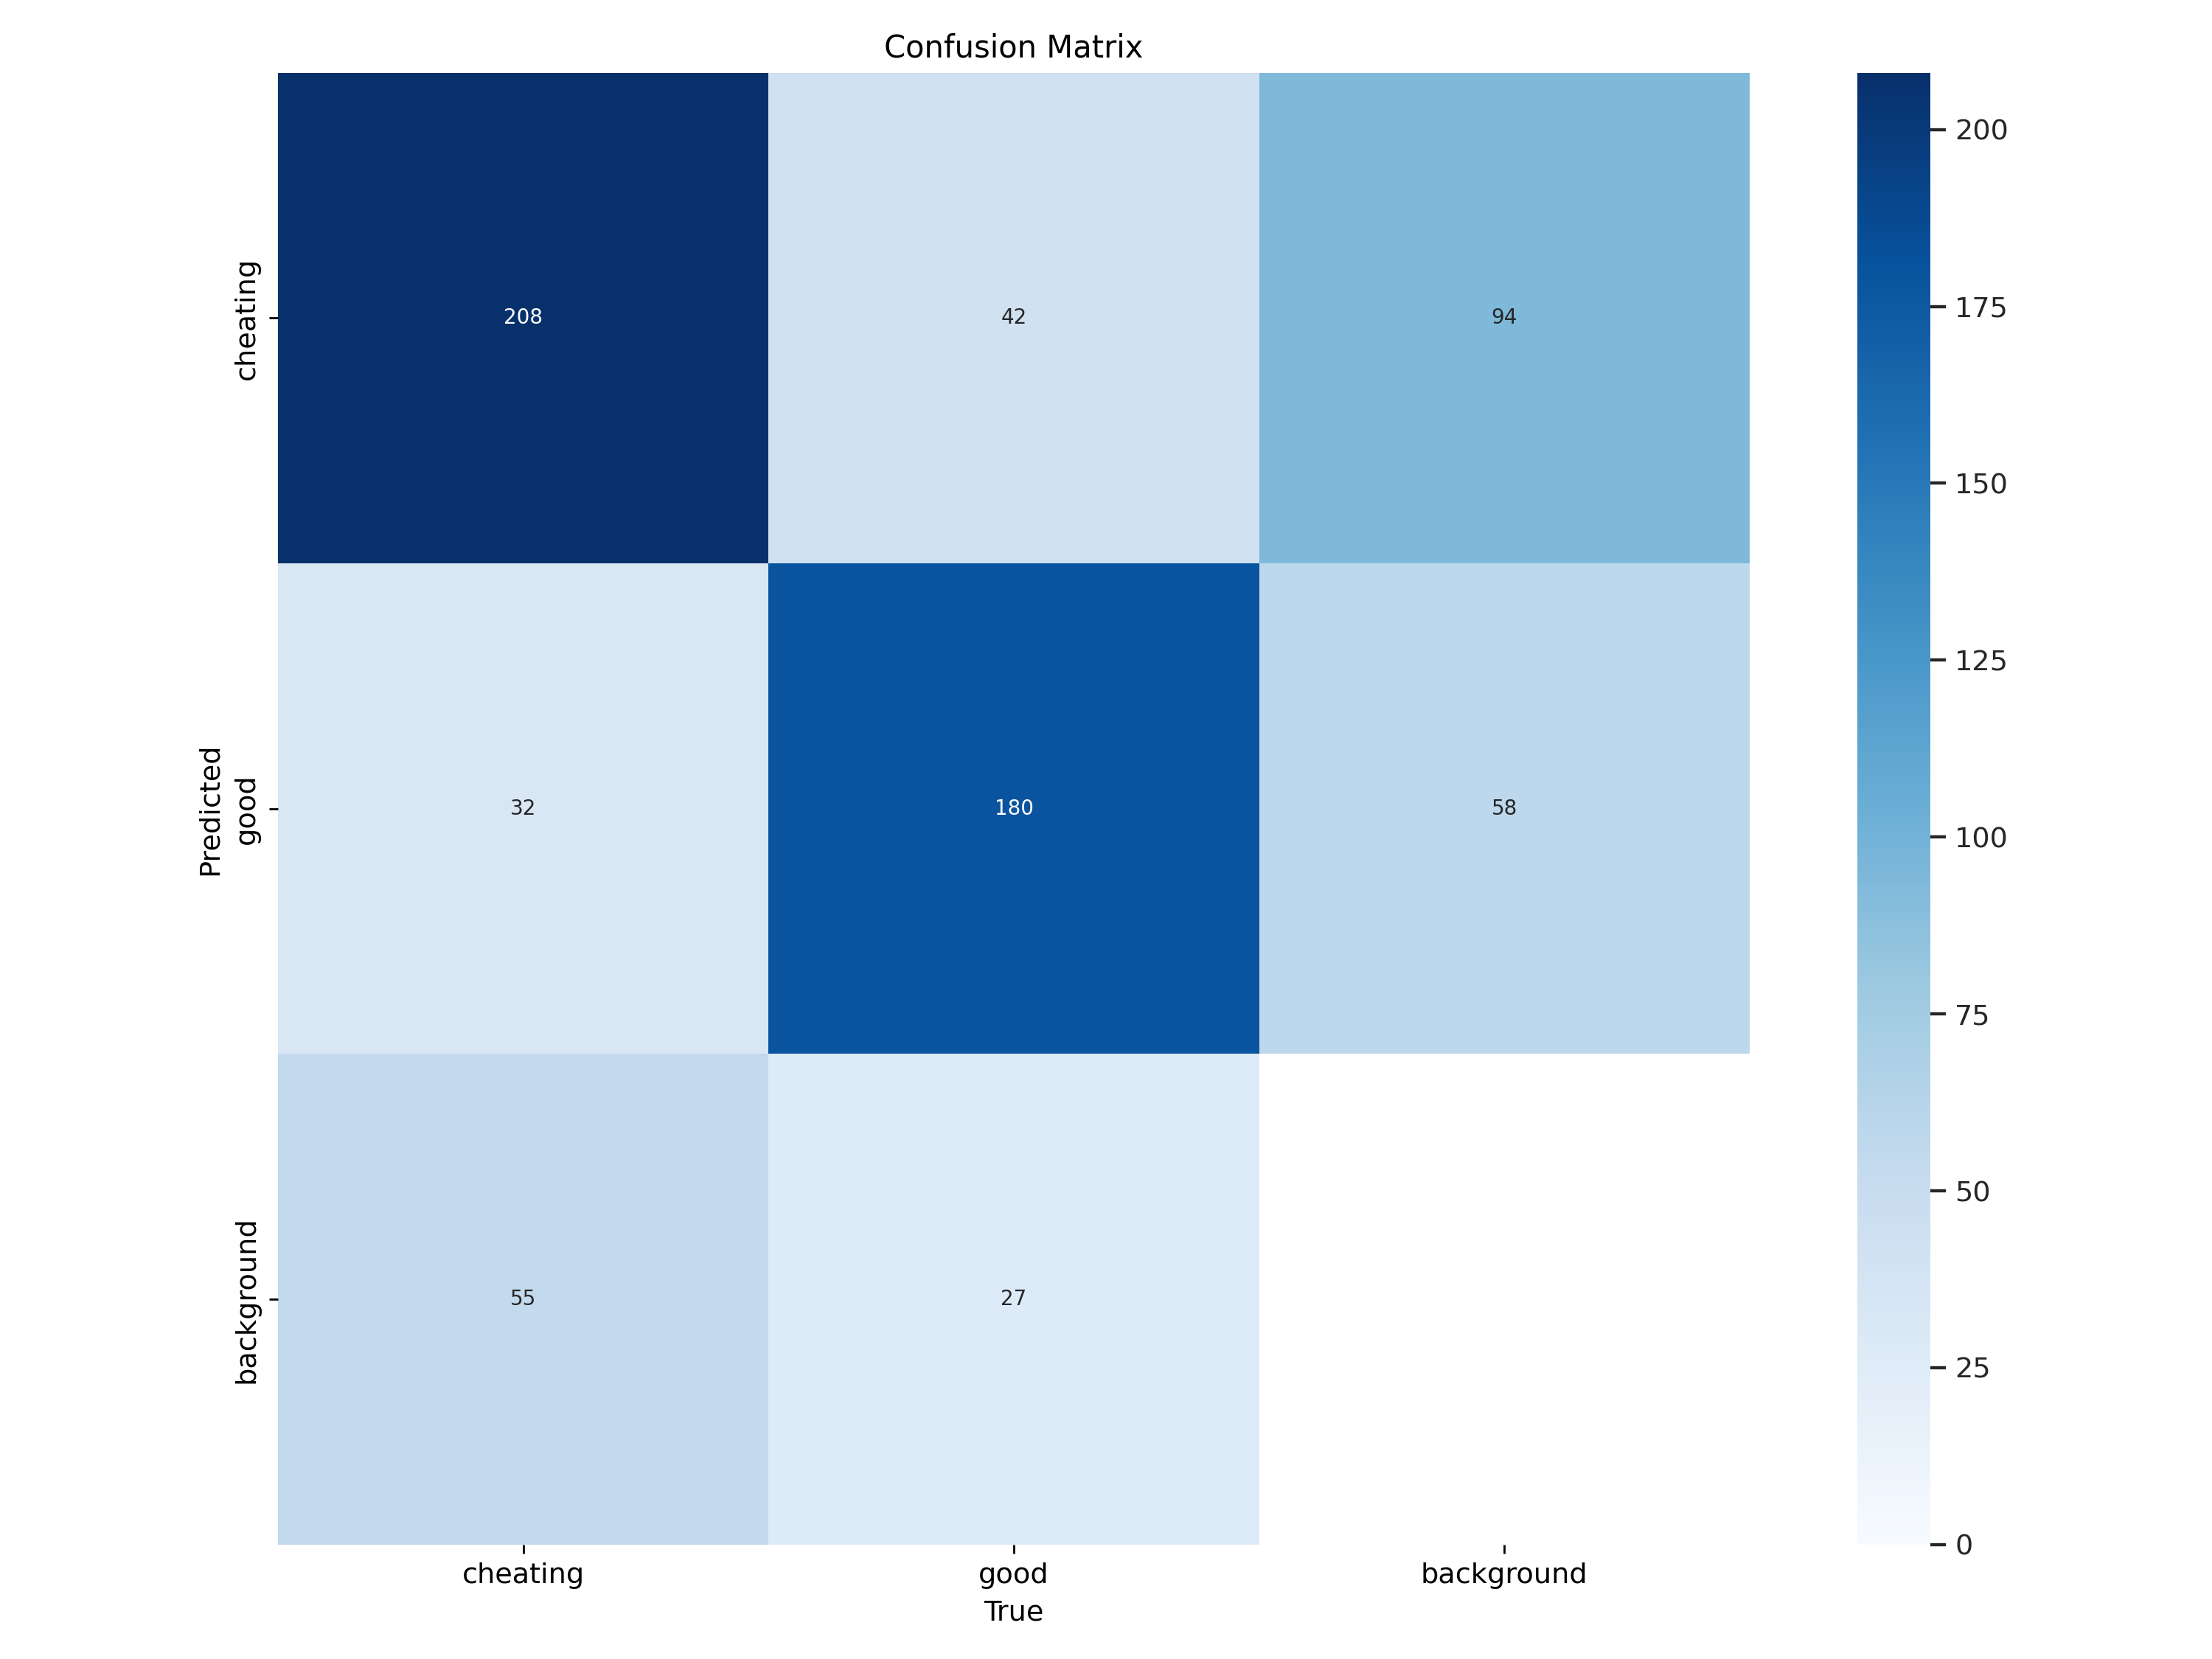

In [7]:
display(Image(filename=f"/kaggle/working/runs/detect/train/confusion_matrix.png", width=1000))

In [8]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt imgsz=640 conf=0.5 \
source=/kaggle/working/Exam-Monitoring-System-v2-2/test/images

Ultralytics YOLOv8.2.7 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/211 /kaggle/working/Exam-Monitoring-System-v2-2/test/images/cheat06_jpg.rf.461aa69ed332fd12fde4e77effd28024.jpg: 640x640 (no detections), 7.3ms
image 2/211 /kaggle/working/Exam-Monitoring-System-v2-2/test/images/cheat08_jpg.rf.3dfc3ed7b2b267b2446b3683484129b4.jpg: 640x640 (no detections), 8.6ms
image 3/211 /kaggle/working/Exam-Monitoring-System-v2-2/test/images/cheat1020_jpg.rf.ec03e6b1e04785ca4cd04b3da4f5739b.jpg: 640x640 1 cheating, 7.3ms
image 4/211 /kaggle/working/Exam-Monitoring-System-v2-2/test/images/cheat1022_jpg.rf.9f87c97e5397414dd4bacd123d2a705a.jpg: 640x640 1 cheating, 7.4ms
image 5/211 /kaggle/working/Exam-Monitoring-System-v2-2/test/images/cheat1033_jpg.rf.1ee85d217d3ed8d05a58eee5496223ca.jpg: 640x640 1 cheating, 7.3ms
image 6/211 /kaggle/working/Exam-Monitoring-System-v2-2/test/images/cheat104_jpg.rf.92be6

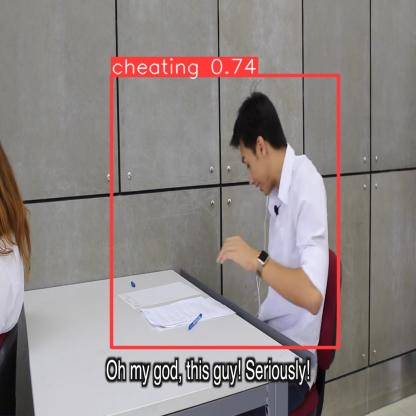

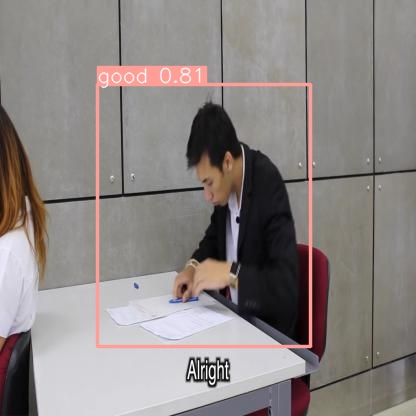

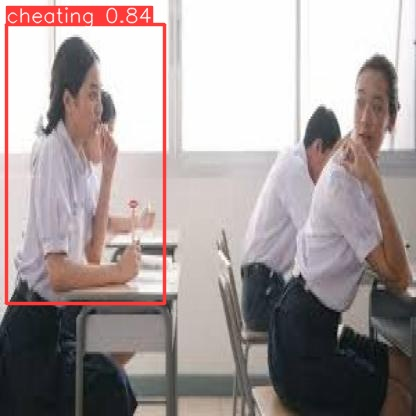

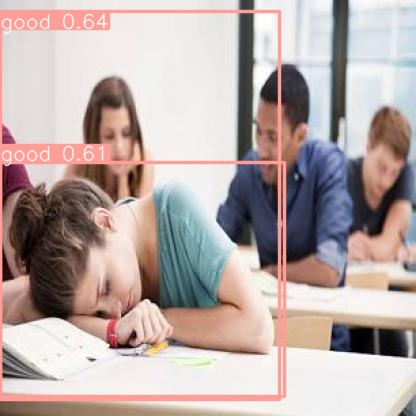

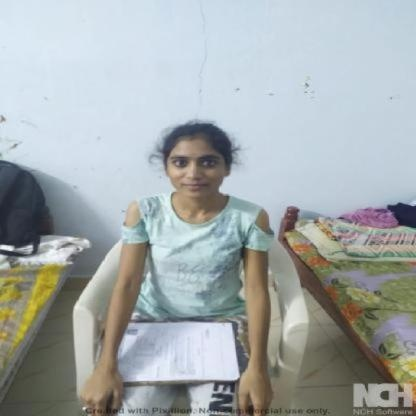

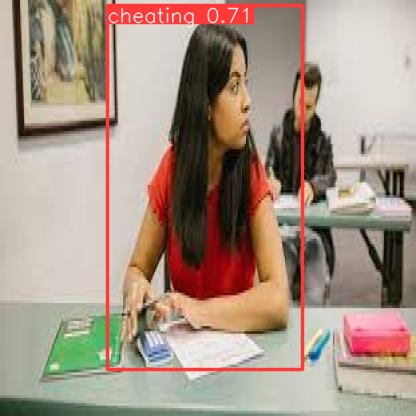

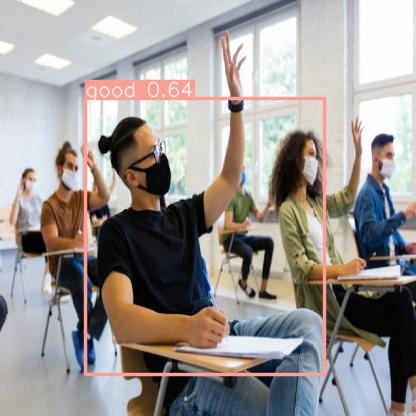

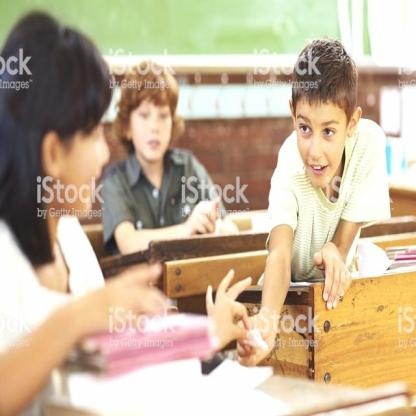

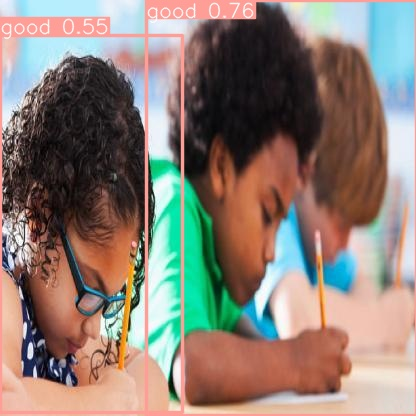

In [9]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/kaggle/working/runs/detect/predict/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1



In [1]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
from ultralytics import YOLO

In [5]:
path = 'img'
images = []
classNames = []
myList = os.listdir(path)
print(myList)

['Eslam Zoghla.jpg', 'sabry.jpg']


In [6]:
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['Eslam Zoghla', 'sabry']


In [7]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [11]:
import datetime

def markAttendance(name):
    with open('Cheating.csv','a+') as f:
        # Check if the file is empty
        f.seek(0)
        first_char = f.read(1)
        if not first_char:
            # If the file is empty, write the header
            f.write('Name,Time\n')

        # Check if the name is already in the CSV file
        name_exists = False
        for line in f:
            if line.startswith(name):
                name_exists = True
                break
        
        # If the name is not in the CSV file, append it
        if not name_exists:
            now = datetime.datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.write(f'{name},{dtString}\n')

encodeListKnown = findEncodings(images)
print('Encoding Complete')

Encoding Complete


In [15]:
# Load the YOLOv8 model
model = YOLO('YOLOV8.pt')

# Open the video file
cap = cv2.VideoCapture(0)
names = model.model.names

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    if success:
        # Flip the frame horizontally
        frame_flipped = cv2.flip(frame, 1)
        
        
        # Run YOLOv8 on the flipped frame
        results = model(frame_flipped)

        for result in results[0].boxes.cpu().numpy():
            x1, y1, x2, y2 = map(int, result.xyxy[0])
            cls = names[int(result.cls[0])]
            conf = result.conf[0].round(2)

            # Adjust text position for the flipped image
            text_pos = (frame_flipped.shape[1] - x2, y1)
            conf_pos = (frame_flipped.shape[1] - x1, y2)

            cv2.rectangle(frame_flipped, (x1, y1), (x2, y2), (0,0,255), 2)

            # Visualize the results on the flipped frame
            cv2.putText(frame_flipped, cls, text_pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX,thickness=2,
                        fontScale=2, color=(0,0,255))
            cv2.putText(frame_flipped, str(conf), conf_pos, fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                        fontScale=1, color=(0,0,255))
            
            if cls == 'cheating':
                facesCurFrame = face_recognition.face_locations(frame_flipped)
                encodesCurFrame = face_recognition.face_encodings(frame_flipped,facesCurFrame)
            
                for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
                    matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
                    print('matches',matches)
                    faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
                    print(faceDis)
                    matchIndex = np.argmin(faceDis)
                    if matches[matchIndex]:
                        name = classNames[matchIndex].upper()
                        print(name)
                        
                        faceLoc = np.array(faceLoc)
                        faceLoc = faceLoc / 0.25
                        faceLoc=faceLoc.astype(int)
                        #y1,x2,y2,x1 = faceLoc # in the other code we risize the face
                        #y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
                        y1, x2, y2, x1 = faceLoc[0], faceLoc[1], faceLoc[2], faceLoc[3]
                        markAttendance(name)

        # Display the annotated flipped frame
        cv2.imshow("Exam Monitoring System", frame_flipped)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 480x640 1 cheating, 126.1ms
Speed: 2.6ms preprocess, 126.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cheating, 204.7ms
Speed: 7.5ms preprocess, 204.7ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)
matches [True, False]
[    0.55163     0.77654]
ESLAM ZOGHLA

0: 480x640 1 cheating, 151.3ms
Speed: 4.0ms preprocess, 151.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 good, 141.8ms
Speed: 1.0ms preprocess, 141.8ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 cheating, 142.4ms
Speed: 3.5ms preprocess, 142.4ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
matches [True, False]
[    0.54035     0.79225]
ESLAM ZOGHLA

0: 480x640 1 cheating, 1 good, 142.0ms
Speed: 2.0ms preprocess, 142.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)
matches [True, False]
[    0.57993     0.77791]
ESLAM ZOGHLA

0: 480x640 1 cheating, 1 good, 1